# Programming Exercise 1: Linear Regression
This exercise implements a python implementation for the first programming exercise of the machine learning coursera course.

## Linear Regression with one variable
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### Plotting the Data
We will first start by importing the data and some python libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
path = os.getcwd() + "/ex1data1.txt"
data = pd.read_csv(path, sep=',', names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Next, we will plot the population and profit on the x and y access respectively.

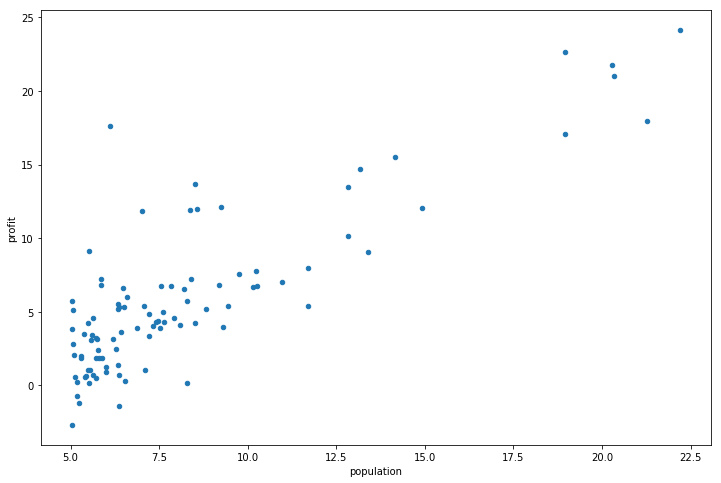

In [5]:
data.plot(x='population', y='profit', kind='scatter', figsize=(12, 8)); # semicolon to hide matplotlib description

### Gradient Descent
We will now fit a linear regression to our dataset using gradient descent. The first step is to define the cost function.

In [6]:
def getCost(X, y, theta, m):
    inner = np.power(X * theta.T - y, 2)
    return np.sum(inner) / (2 * m)

To prep the data, we need to insert ones into the 0th column of the dataframe due to X_0

In [7]:
data.insert(loc=0, column='Ones', value=1)

Next we will compute the cost with theta initialized to 0s. We should expect a cost of 32.07.

In [8]:
X = np.matrix(data.iloc[:,0:2])
y = np.matrix(data.iloc[:,2:3])
theta = np.zeros((1, 2))
m = X.shape[0] # number of training examples
cost = getCost(X, y, theta, m)
print("initial cost = %f" % cost)

initial cost = 32.072734


Now we create our gradient descent function.

In [9]:
def gradientDescent(X, y, theta, m, lr, iters):
    # create a temporary storage for the thetas
    temp = np.zeros((1, theta.shape[1]))
    
    # create a cost array to track cost at every iteration
    costArray = np.zeros(iters)
    numParameters = theta.shape[1]
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(numParameters):
            # get column vector of current parameter in X and do COMPONENT MULTIPLICATION with the error
            inner = np.multiply(error, X[:, j])
                        
            # store new theta into temp
            temp[0, j] = theta[0, j] - lr / m * (np.sum(inner))
            
        theta = temp
        # print(getCost(X, y, theta, m))
        costArray[i] = getCost(X, y, theta, m)
    return theta, costArray

In [10]:
# initialize variables
lr = 0.01
iters = 1000

# perform gradient descent
g, costArray = gradientDescent(X, y, theta, m, lr, iters)

## Viewing results
We will now visually confirm the linear regression line fits the data quite well and that our losses were decreasing.


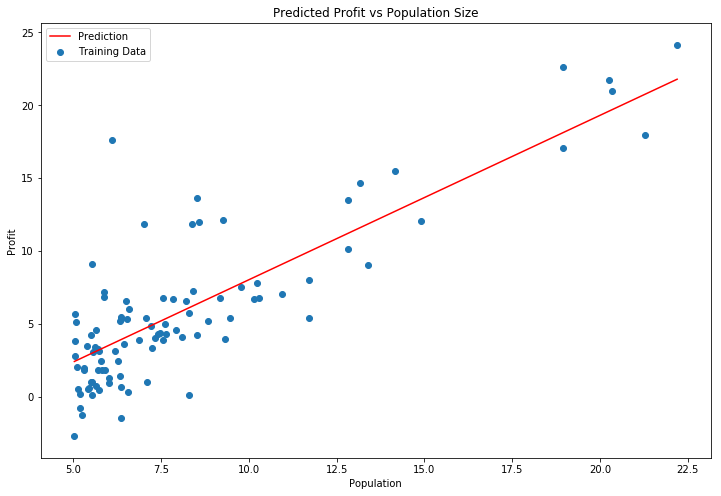

In [30]:
# stores the x values population into an array
x = np.linspace(data.population.min(), data.population.max(), 100)

# stores the y value (= b + mx)
f = g[0, 0] + (g[0, 1] * x)

# use matplotlib, plotting f against x
fig, ax = plt.subplots(figsize=(12, 8));
ax.plot(x, f, 'r', label='Prediction');
ax.scatter(data.population, data.profit, label='Training Data');
ax.legend(loc=2);
ax.set_xlabel('Population');
ax.set_ylabel('Profit');
ax.set_title('Predicted Profit vs Population Size');

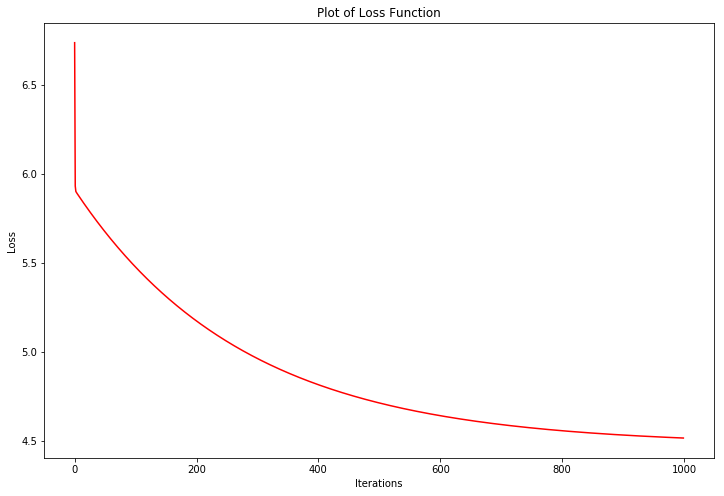

In [33]:
fig, ax = plt.subplots(figsize=(12, 8));
ax.plot(np.arange(iters), costArray, 'r');
ax.set_xlabel('Iterations');
ax.set_ylabel('Loss');
ax.set_title('Plot of Loss Function');